In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd


from datetime import datetime
pd.options.mode.string_storage = 'python'


In [2]:
data_path = "/Users/lucy/Desktop/UCLA/pems_data/pems_data_station_hour/merged_hour.csv"
df = dd.read_csv(data_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,05/01/2024 00:00:00,715900,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/01/2024 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/01/2024 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/01/2024 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/2024 00:00:00,715905,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
n_rows = df.shape[0].compute()  # compute the number of rows
# original: 42mil rows
n_rows

42923820

In [ ]:
# 0 Timestamp	The date and time of the beginning of the summary interval. For example, a time of 08:00:00 indicates that the aggregate(s) contain measurements collected between 08:00:00 and 08:59:59. Note that minute and second values are always 0 for hourly aggregations. The format is MM/DD/YYYY HH24:MI:SS.	 
# 1 Station	Unique station identifier. Use this value to cross-reference with Metadata files.	 
# 2 District	District #	 
# 3 Route	Route #	 
# 4 Direction of Travel	N | S | E | W	 
# 5 Lane Type	A string indicating the type of lane. Possible values (and their meaning are:
# CD (Coll/Dist)
# CH (Conventional Highway)
# FF (Fwy-Fwy connector)
# FR (Off Ramp)
# HV (HOV)
# ML (Mainline)
# OR (On Ramp)
 
# 6 Station Length	Segment length covered by the station in miles/km.	 
# 7 Samples	Total number of samples received for all lanes.	 
# 8 % Observed	Percentage of 5-minute lane points that were observed (e.g. not imputed).	%
# 9 Total Flow	Sum of 5-minute flows over the hour. Note that the basic 5-minute rollup normalizes flow by the number of good samples received from the controller.	Veh/Hour
# 10 Avg Occupancy	Average of 5-minute station occupancies over the hour expressed as a decimal number between 0 and 1.	%
# 11 Avg Speed	Flow-weighted average of 5-minute station speeds. If flow is 0, mathematical average of 5-minute station speeds.	Mph
# 12 Delay (V_t=35)	The average delay over the station length, with respect to a threshold speed of 35 mph.	 
# 13 Delay (V_t=40)	The average delay over the station length, with respect to a threshold speed of 40 mph.	 
# 14 Delay (V_t=45)	The average delay over the station length, with respect to a threshold speed of 45 mph.	 
# 15 Delay (V_t=50)	The average delay over the station length, with respect to a threshold speed of 50 mph.	 
# 16 Delay (V_t=55)	The average delay over the station length, with respect to a threshold speed of 55 mph.	 
# 17 Delay (V_t=60)	The average delay over the station length, with respect to a threshold speed of 60 mph.	 
# Lane N Flow	Sum of 5-minute flows for lane N over the hour. Note that the basic 5-minute rollup normalizes flow by the number of good samples received from the controller. N ranges from 1 to the number of lanes at the location.	Veh/Hour
# Lane N Avg Occ	Average of 5-minute occupancies for lane N over the hour expressed as a decimal number between 0 and 1. N ranges from 1 to the number of lanes at the location.	%
# Lane N Avg Speed	Flow-weighted average of 5-minute lane N speeds. If flow is 0, mathematical average of 5-minute lane speeds. N ranges from 1 to the number of lanes at the location.

In [9]:
len(df.columns)

42

In [3]:
# SET COLUMN NAMES
first_columns = ['timestamp', 'station_id', 'district', 'route_num', 'travel_dir', 'lane_type', 'station_len', 'sample_num',
                 'percent_observed', 'total_flow', 'avg_occupancy', 'avg_speed', 'delay_35', 'delay_40', 'delay_45', 'delay_50',
                 'delay_55', 'delay_60']

# generate the rest of the column names
lane_columns = [] # start from column number = 12
lane_num = 1
col_type_index = 0
col_types = ['lane_flow', 'lane_avg_occ', 'lane_avg_speed']
for i in range(len(first_columns), len(df.columns)):
  new_col_name =  col_types[col_type_index] + '_' + str(lane_num)
  col_type_index += 1
  lane_columns.append(new_col_name)
  # means you have reached the end of col_types list
  if col_type_index == 3:
    col_type_index = 0
    lane_num += 1

final_columns = first_columns + lane_columns
final_columns

['timestamp',
 'station_id',
 'district',
 'route_num',
 'travel_dir',
 'lane_type',
 'station_len',
 'sample_num',
 'percent_observed',
 'total_flow',
 'avg_occupancy',
 'avg_speed',
 'delay_35',
 'delay_40',
 'delay_45',
 'delay_50',
 'delay_55',
 'delay_60',
 'lane_flow_1',
 'lane_avg_occ_1',
 'lane_avg_speed_1',
 'lane_flow_2',
 'lane_avg_occ_2',
 'lane_avg_speed_2',
 'lane_flow_3',
 'lane_avg_occ_3',
 'lane_avg_speed_3',
 'lane_flow_4',
 'lane_avg_occ_4',
 'lane_avg_speed_4',
 'lane_flow_5',
 'lane_avg_occ_5',
 'lane_avg_speed_5',
 'lane_flow_6',
 'lane_avg_occ_6',
 'lane_avg_speed_6',
 'lane_flow_7',
 'lane_avg_occ_7',
 'lane_avg_speed_7',
 'lane_flow_8',
 'lane_avg_occ_8',
 'lane_avg_speed_8']

In [4]:
df.columns = final_columns

In [124]:
len(df['station_id'].unique().compute())

4888

In [5]:
df['timestamp_conv'] = dd.to_datetime(df['timestamp'], format="%m/%d/%Y %H:%M:%S")

In [35]:
df['timestamp_conv'].compute()

0        2024-05-01 00:00:00
1        2024-05-01 00:00:00
2        2024-05-01 00:00:00
3        2024-05-01 00:00:00
4        2024-05-01 00:00:00
                 ...        
507378   2024-12-31 23:00:00
507379   2024-12-31 23:00:00
507380   2024-12-31 23:00:00
507381   2024-12-31 23:00:00
507382   2024-12-31 23:00:00
Name: timestamp_conv, Length: 42923820, dtype: datetime64[ns]

In [34]:
df.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv
0,05/01/2024 00:00:00,715900,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
1,05/01/2024 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
2,05/01/2024 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
3,05/01/2024 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
4,05/01/2024 00:00:00,715905,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01


In [ ]:
# combine route and travel dir into one string
# df = df.assign(highway=str(df['route_num']) + '_' + df['travel_dir'])  
# df['highway'] = str(df['route_num'].compute()) + '_' + df['travel_dir'].compute()

In [81]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 44 entries, timestamp to highway
dtypes: datetime64[ns](1), object(4), float64(34), int64(1), string(4)

In [6]:
# run time: 30 sec
# 1. Group by station_id and compute % missing in 'total_flow' for each group
missing_ratios = (
    df.groupby('station_id')['total_flow']
    .apply(lambda x: x.isna().mean(), meta=('total_flow', 'float64'))
    .compute()
)

# 2. Find station_ids with more than 80% missing
# 6.2.25 - RAISED threshold to 60% missing ratio
bad_stations = missing_ratios[missing_ratios > 0.6].index.tolist()
print(bad_stations)

# 3. Filter out those station_ids from the original Dask DataFrame
df_filtered = df[~df['station_id'].isin(bad_stations)]

[716303, 716386, 716526, 716558, 716824, 717191, 718057, 718477, 761468, 763763, 763854, 767037, 767510, 768736, 769506, 772384, 776254, 716346, 716397, 716415, 716638, 718348, 764740, 765218, 767701, 768203, 768564, 770172, 771500, 715904, 715923, 716005, 716479, 716501, 716727, 717386, 717946, 717955, 718181, 718209, 761735, 763939, 764353, 765007, 765083, 767165, 769705, 775962, 776316, 715924, 716105, 716373, 716462, 716474, 716496, 716736, 717584, 717802, 718062, 718282, 760586, 764682, 764986, 766286, 769912, 775211, 716011, 716550, 716563, 716863, 717577, 718222, 718237, 762378, 763923, 764733, 768177, 768726, 769746, 770333, 774150, 774193, 775270, 776369, 716055, 716124, 716514, 716671, 716717, 717485, 717953, 718005, 761056, 764998, 765137, 765151, 766242, 768668, 771778, 774659, 777285, 715993, 716064, 716145, 716301, 716412, 716512, 716565, 716771, 716846, 717107, 717407, 717690, 717868, 718416, 760156, 765837, 768321, 768766, 769456, 769474, 771768, 775366, 716074, 716207,

In [7]:
#### tester - neuralprophet
tester_np = df_filtered[df_filtered['station_id'] == 766740]
tester_np = tester_np.compute()
tester_np.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv
3240,05/01/2024 00:00:00,766740,7,14,N,ML,3.75,323,100,729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 00:00:00
8128,05/01/2024 01:00:00,766740,7,14,N,ML,3.75,333,100,514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 01:00:00
13015,05/01/2024 02:00:00,766740,7,14,N,ML,3.75,348,100,363.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 02:00:00
17902,05/01/2024 03:00:00,766740,7,14,N,ML,3.75,351,100,380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 03:00:00
22789,05/01/2024 04:00:00,766740,7,14,N,ML,3.75,351,100,547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 04:00:00


In [8]:
df_prophet = tester_np[['timestamp_conv', 'avg_speed']]
df_prophet.columns = ['ds', 'y'] # rename columns for Prophet
df_prophet.head()


,ds,y
3240,2024-05-01 00:00:00,69.1
8128,2024-05-01 01:00:00,69.0
13015,2024-05-01 02:00:00,68.9
17902,2024-05-01 03:00:00,68.7
22789,2024-05-01 04:00:00,68.4


In [18]:
from neuralprophet import NeuralProphet
model = NeuralProphet()
model.set_plotting_backend("matplotlib")

metrics = model.fit(df_prophet)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.852% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as h
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralPr

Epoch 60: 100%|██████████| 60/60 [07:10<00:00,  0.14it/s]   

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 60



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (138) is too small than the required number                     for the learning rate finder (248). The results might not be optimal.
Finding best initial lr: 100%|██████████| 248/248 [00:02<00:00, 93.24it/s]


Training: |          | 0/? [01:23<?, ?it/s, v_num=7, train_loss=0.0059, reg_loss=0.000, MAE=1.700, RMSE=2.660, Loss=0.00594, RegLoss=0.000] 


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.852% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) -

Predicting DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 178.32it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_matplotlib.py:84: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebook

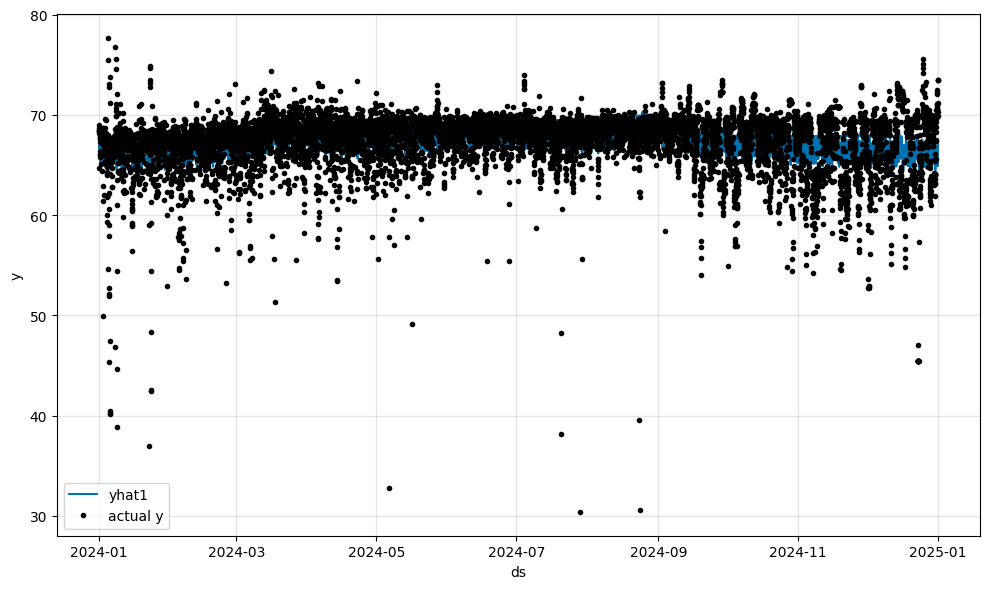

In [ ]:
forecast = model.predict(df_prophet)
model.plot(forecast)
# model.plot_components(forecast)
model.plot_parameters()
plt.savefig("COMPONENTS_plot.png")
plt.close()

In [144]:
!pip install neuralprophet

  Using cached neuralprophet-0.9.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached captum-0.8.0-py3-none-any.whl.metadata (26 kB)
  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached plotly-6.1.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached pytorch_lightning-2.5.1.post0-py3-none-any.whl.metadata (20 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached torchmetrics-1.7.2-py3-none-any.whl.metadata (21 kB)
  Using cached narwhals-1.41.0-py3-none-any.whl.metadata (11 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached markdown-3.8-py3-none-a

In [9]:
from neuralprophet import NeuralProphet
model = NeuralProphet()
model.fit(df_prophet)

/Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (138) is too small than the required number                     for the learning rate finder (248). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 15. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 248/248 [00:03<00:00, 79.09it/s]


Training: |          | 0/? [01:21<?, ?it/s, v_num=4, train_loss=0.0059, reg_loss=0.000, MAE=1.690, RMSE=2.630, Loss=0.00588, RegLoss=0.000] 


,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.322294,0.0,22.462780,26.469860,0.321090,0.0,0
1,0.032469,0.0,4.674252,5.808765,0.032298,0.0,1
2,0.006305,0.0,1.793580,2.758892,0.006290,0.0,2
3,0.006235,0.0,1.776663,2.725003,0.006208,0.0,3
4,0.006309,0.0,1.794056,2.755136,0.006292,0.0,4
5,0.006416,0.0,1.844439,2.801513,0.006470,0.0,5
6,0.006547,0.0,1.858142,2.797317,0.006528,0.0,6
7,0.006705,0.0,1.912923,2.855300,0.006698,0.0,7
8,0.007291,0.0,2.047663,2.968544,0.007303,0.0,8
9,0.007254,0.0,2.060337,2.959361,0.007238,0.0,9


In [11]:
df_prophet.isna().sum()

ds    0
y     0
dtype: int64

In [163]:
%pip uninstall -y neuralprophet numpy
%pip install numpy<2.0
%pip install neuralprophet

Found existing installation: neuralprophet 0.9.0
Uninstalling neuralprophet-0.9.0:
  Successfully uninstalled neuralprophet-0.9.0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.
zsh:1: no such file or directory: 2.0
Note: you may need to restart the kernel to use updated packages.
  Using cached neuralprophet-0.9.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached neuralprophet-0.9.0-py3-none-any.whl (145 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [neuralprophet]
Note: you may need to restart the kernel to use updated packages.


In [10]:
print("NumPy version:", np.__version__)

NumPy version: 1.26.4


In [11]:
forecast = model.predict(df_prophet)

WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.852% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated

Predicting DataLoader 0: 100%|██████████| 9/9 [00:00<00:00, 89.97it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [16]:
%pip install plotly-resampler

  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.1 MB/s eta 0:00:00a 0:00:01
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.7 MB/s eta 0:00:00a 0:00:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2025.4.26-py3-none-any.whl (159 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully unin

In [23]:
%pip uninstall plotly kaleido -y
%pip install plotly==5.19.0 kaleido

Found existing installation: plotly 5.24.1
Uninstalling plotly-5.24.1:
  Successfully uninstalled plotly-5.24.1
Found existing installation: kaleido 0.2.1
Uninstalling kaleido-0.2.1:
  Successfully uninstalled kaleido-0.2.1
Note: you may need to restart the kernel to use updated packages.
  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 2.9 MB/s eta 0:00:0000:0100:01
Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl (85.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [12]:
fig = model.plot_parameters()
fig.write_image("tester_prophet_components.png") 

ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class

In [16]:
model.plot(forecast)


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




ImportError: Please install ipywidgets>=7.0.0 to use the FigureWidget class

In [18]:
from neuralprophet import NeuralProphet
from neuralprophet.plot_forecast_plotly import plot, plot_components
import pandas as pd
import numpy as np

# ----- 1. Load and prepare data -----
# Replace with your actual data

# ----- 2. Initialize and train model -----
model = NeuralProphet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,
    n_lags=0,
    n_forecasts=24  # Predict next 24 time steps (e.g., next 24 hours)
)

model.fit(df_prophet, freq='H')  # 'H' for hourly data

# ----- 3. Make future dataframe and forecast -----
future = model.make_future_dataframe(df_prophet, periods=24)
forecast = model.predict(future)

# ----- 4. Plot and save forecast -----
fig_forecast = plot(forecast, quantiles=model.config_train.quantiles)
fig_forecast.write_image("forecast_plot.png")

# ----- 5. Plot and save forecast components -----
plot_configuration = {
    "components_list": [
        {"plot_name": "trend", "comp_name": "trend", "multiplicative": False},
        {"plot_name": "daily", "comp_name": "daily", "multiplicative": False},
        {"plot_name": "weekly", "comp_name": "weekly", "multiplicative": False}
    ]
}

fig_components = plot_components(model, forecast, plot_configuration)
fig_components.write_image("components_plot.png")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.852% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astyp

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (138) is too small than the required number                     for the learning rate finder (248). The results might not be optimal.
Finding best initial lr: 100%|██████████| 248/248 [00:02<00:00, 92.90it/s]


Training: |          | 0/? [01:21<?, ?it/s, v_num=5, train_loss=0.0059, reg_loss=0.000, MAE=1.700, RMSE=2.660, Loss=0.00593, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.852% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1173: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/no


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 30.87it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [17]:
from neuralprophet.plot_forecast_plotly import plot_components

# forecast = model.predict(df)

# fig = plot_components_plotly(model, forecast) 
plot_configuration = {
    # "seasonality": ["weekly", "daily"],   # or "weekly", "yearly", etc. depending on your model
    "trend": True,
}
fig = plot_components(model, forecast, plot_configuration)
fig.write_image("tester_prophet_components.png") 

KeyError: 'components_list'

In [ ]:
# store preprocessed data in a csv so that backend can read it without having to preprocess again
# 4 minutes to run
# output_path = "../backend/merged_hour_preprocessed.csv"
# df_filtered.to_csv(output_path, single_file=True, index=False)

['/Users/lucy/Desktop/UCLA/Project418/backend/merged_hour_preprocessed.csv']

In [111]:
kept_stations = df_filtered['station_id'].unique().compute()

In [113]:
# take station ids list and write to a file
with open('filtered_stations.txt', 'w') as f:
    for station in kept_stations:
        f.write(f"{station}\n")

In [114]:
# read contents of .txt file into a python list
with open('filtered_stations.txt', 'r') as f:
    filtered_stations = [int(line.replace('\n', '')) for line in f.readlines()]

In [115]:
# only have unique station ids that have <0.8 missing values
filtered_stations.sort()
filtered_stations[:10]

[715898,
 715915,
 715916,
 715918,
 715920,
 715929,
 715930,
 715933,
 715935,
 715937]

In [ ]:
len(filtered_stations) # filter down by a factor of 10, 3432 -> 300 

3432

In [117]:
filtered_reduced_stations = filtered_stations[::10]
filtered_reduced_stations[:10]

[715898,
 715938,
 715982,
 716016,
 716036,
 716078,
 716095,
 716110,
 716131,
 716152]

In [118]:
with open('filtered_reduced_stations.txt', 'w') as f:
    for station in filtered_reduced_stations:
        f.write(f"{station}\n")

In [105]:
715915 in filtered_reduced_stations

False

In [99]:
type(df_filtered)

dask_expr._collection.DataFrame

In [100]:
# run time: 30 sec
filtered_reduced_df = df_filtered[df_filtered['station_id'].isin(filtered_reduced_stations)] # .compute()

In [102]:
filtered_reduced_df.shape[0].compute() # reduce to 3mil rows

3020440

In [103]:
type(filtered_reduced_df)

dask_expr._collection.DataFrame

In [ ]:
# write to csv, time: 1 min
output_path = "../backend/merged_hour_preprocessed_small.csv"
filtered_reduced_df.to_csv(output_path, single_file=True, index=False)

['/Users/lucy/Desktop/UCLA/Project418/backend/merged_hour_preprocessed_small.csv']

In [12]:
len(bad_stations)

1380

In [ ]:
# 4889 total station ids
# df['station_id'].value_counts().compute()

station_id
715947    8783
716046    8783
716084    8783
716093    8783
716201    8783
          ... 
774140    8783
774246    8783
774878    8783
775100    8783
776241    8783
Name: count, Length: 4889, dtype: int64

In [16]:
df_filtered.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv,highway
11,05/01/2024 00:00:00,715915,7,5,N,ML,0.620,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
12,05/01/2024 00:00:00,715916,7,5,S,ML,0.710,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
13,05/01/2024 00:00:00,715918,7,5,N,ML,0.615,0,0,1476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
14,05/01/2024 00:00:00,715920,7,5,S,ML,1.150,0,0,2181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
17,05/01/2024 00:00:00,715925,7,5,S,OR,NaN,107,100,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...


In [82]:
# filtered = df[df['percent_observed'] != 0]
# filtered.head()

In [65]:
df_filtered.shape[0].compute() # 30mil rows, filter out rows with >0.8 ratio missing values

30135772

In [ ]:
# filter every 10th row out to reduce size
df_filtered = df_filtered[::10].compute()

In [52]:
dask_df = dd.read_csv("../backend/merged_hour_preprocessed.csv")
dask_df.head()


,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_speed_5,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8
0,05/01/2024 00:00:00,715915,7,5,N,ML,0.620,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/01/2024 00:00:00,715916,7,5,S,ML,0.710,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/01/2024 00:00:00,715918,7,5,N,ML,0.615,0,0,1476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/01/2024 00:00:00,715920,7,5,S,ML,1.150,0,0,2181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/2024 00:00:00,715925,7,5,S,OR,NaN,107,100,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print(dask_df['timestamp_conv'].dtype)  # should show datetime64[ns]

string


In [37]:
## EDA on test station, station ID = 715926 -> only has data from jan - may
# 40 seconds
df_eda_test = df[df['station_id'] == 715915]
df_eda_test.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv
12,05/01/2024 00:00:00,715915,7,5,N,ML,0.62,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 00:00:00
4900,05/01/2024 01:00:00,715915,7,5,N,ML,0.62,0,0,1240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 01:00:00
9788,05/01/2024 02:00:00,715915,7,5,N,ML,0.62,0,0,1053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 02:00:00
14674,05/01/2024 03:00:00,715915,7,5,N,ML,0.62,0,0,1168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 03:00:00
19562,05/01/2024 04:00:00,715915,7,5,N,ML,0.62,0,0,2182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 04:00:00


In [41]:
# 0               2024-05-01  68.6 weird row
df_eda_test[df_eda_test['avg_speed'] == 68.6].compute()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv
12,05/01/2024 00:00:00,715915,7,5,N,ML,0.62,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 00:00:00
464070,05/04/2024 23:00:00,715915,7,5,N,ML,0.62,0,0,4588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-04 23:00:00
478723,05/05/2024 02:00:00,715915,7,5,N,ML,0.62,0,0,1505.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-05 02:00:00
483609,05/05/2024 03:00:00,715915,7,5,N,ML,0.62,0,0,1113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-05 03:00:00
308299,05/07/2024 22:00:00,715915,7,5,N,ML,0.62,0,0,4084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-07 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193324,12/25/2024 00:00:00,715915,7,5,N,ML,0.62,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-25 00:00:00
150572,12/28/2024 23:00:00,715915,7,5,N,ML,0.62,0,0,4588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-28 23:00:00
165236,12/29/2024 02:00:00,715915,7,5,N,ML,0.62,0,0,1505.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-29 02:00:00
170124,12/29/2024 03:00:00,715915,7,5,N,ML,0.62,0,0,1113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-29 03:00:00


In [12]:
# convert to pandas dataframe for EDA
# ~1 minute to run
pandas_test_df = df_eda_test.compute()

In [19]:
#total_flow          5369
# avg_occupancy       5369
# avg_speed
print(pandas_test_df.shape)
pandas_test_df.isna().sum()

(8783, 44)


timestamp              0
station_id             0
district               0
route_num              0
travel_dir             0
lane_type              0
station_len            0
sample_num             0
percent_observed       0
total_flow             0
avg_occupancy          0
avg_speed              0
delay_35               0
delay_40               0
delay_45               0
delay_50               0
delay_55               0
delay_60               0
lane_flow_1            0
lane_avg_occ_1         0
lane_avg_speed_1       0
lane_flow_2            0
lane_avg_occ_2         0
lane_avg_speed_2       0
lane_flow_3            0
lane_avg_occ_3         0
lane_avg_speed_3       0
lane_flow_4         8783
lane_avg_occ_4      8783
lane_avg_speed_4    8783
lane_flow_5         8783
lane_avg_occ_5      8783
lane_avg_speed_5    8783
lane_flow_6         8783
lane_avg_occ_6      8783
lane_avg_speed_6    8783
lane_flow_7         8783
lane_avg_occ_7      8783
lane_avg_speed_7    8783
lane_flow_8         8783


In [20]:
pandas_test_df[pandas_test_df.isnull()]

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv,highway
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
9787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
19561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
487844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
492732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
497620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [31]:
pandas_test_df.columns

Index(['timestamp', 'station_id', 'district', 'route_num', 'travel_dir',
       'lane_type', 'station_len', 'sample_num', 'percent_observed',
       'total_flow', 'avg_occupancy', 'avg_speed', 'delay_35', 'delay_40',
       'delay_45', 'delay_50', 'delay_55', 'delay_60', 'lane_flow_1',
       'lane_avg_occ_1', 'lane_avg_speed_1', 'lane_flow_2', 'lane_avg_occ_2',
       'lane_avg_speed_2', 'lane_flow_3', 'lane_avg_occ_3', 'lane_avg_speed_3',
       'lane_flow_4', 'lane_avg_occ_4', 'lane_avg_speed_4', 'lane_flow_5',
       'lane_avg_occ_5', 'lane_avg_speed_5', 'lane_flow_6', 'lane_avg_occ_6',
       'lane_avg_speed_6', 'lane_flow_7', 'lane_avg_occ_7', 'lane_avg_speed_7',
       'lane_flow_8', 'lane_avg_occ_8', 'lane_avg_speed_8', 'timestamp_conv',
       'highway', 'time', 'month'],
      dtype='object')

In [35]:
pandas_test_df[["delay_45"]]

,delay_45
11,0.0
4899,0.0
9787,0.0
14673,0.0
19561,0.0
...,...
482956,0.0
487844,0.0
492732,0.0
497620,0.0


<Axes: ylabel='timestamp_conv'>

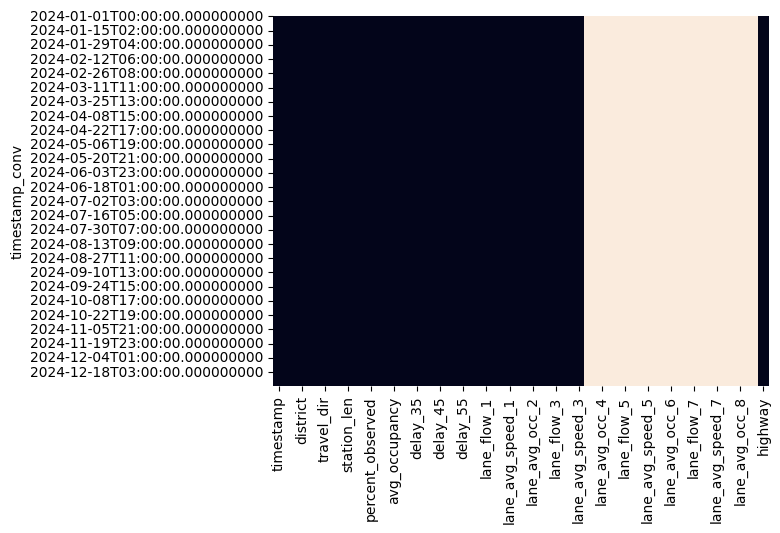

In [13]:
# pattern_tester = pandas_test_df.set_index('timestamp_conv')
df_sorted = pandas_test_df.sort_values(by='timestamp_conv')
pattern_tester = df_sorted.set_index('timestamp_conv')
pattern_tester.head()
sns.heatmap(pattern_tester.isnull(), cbar=False)

<Axes: xlabel='lane_type', ylabel='Count'>

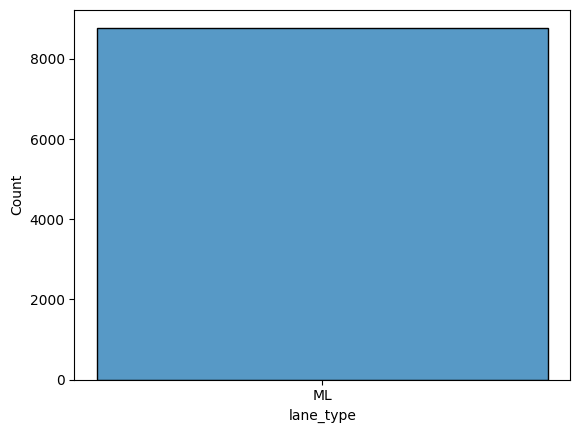

In [22]:
sns.histplot(data=pandas_test_df, x='lane_type') # OR = on-ramp

<Axes: xlabel='time'>

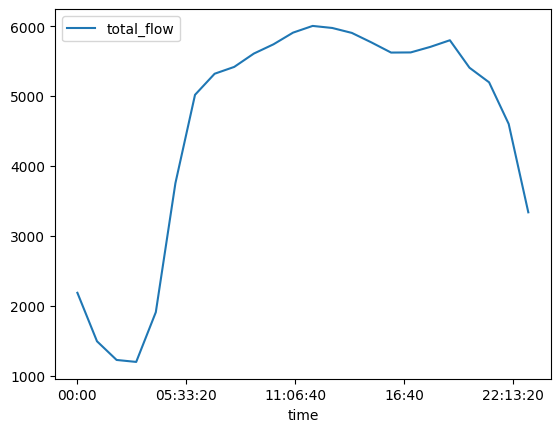

In [ ]:
# busiest times of the day
# vehicles per hour
pandas_test_df['time'] = pandas_test_df['timestamp_conv'].dt.time
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['total_flow'].mean())
group_by_hour
group_by_hour.plot(y='total_flow')  # timestamp is now x-axis

<Axes: xlabel='time'>

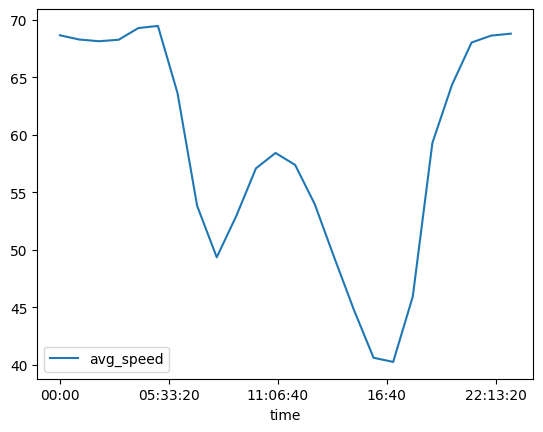

In [26]:
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['avg_speed'].mean())
group_by_hour
group_by_hour.plot(y='avg_speed')  # timestamp is now x-axis

<Axes: xlabel='time'>

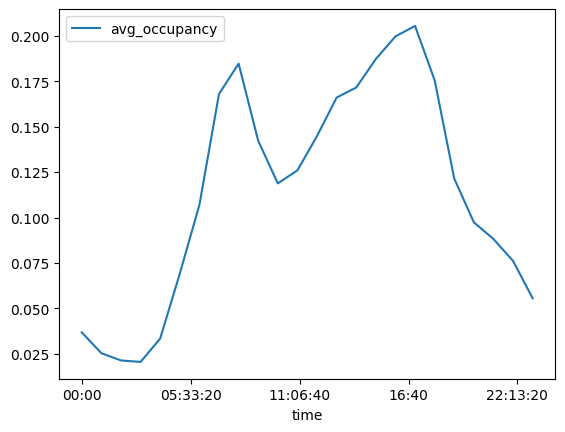

In [27]:
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['avg_occupancy'].mean())
group_by_hour
group_by_hour.plot(y='avg_occupancy')  # timestamp is now x-axis

In [24]:
pandas_test_df['total_flow'].value_counts(dropna=False)

total_flow
6116.0    104
5758.0    104
2764.0     53
5898.0     53
4920.0     53
         ... 
5777.0     52
5855.0     52
5816.0     52
6209.0     52
1505.0     51
Name: count, Length: 166, dtype: int64

        total_flow
month             
1      4562.010753
2      4570.849138
3      4584.811575
4      4563.706944
5      4573.223118
6      4576.555556
7      4562.010753
8      4582.555108
9      4565.987500
10     4564.529570
11     4583.258333
12     4561.751344


<Axes: xlabel='month'>

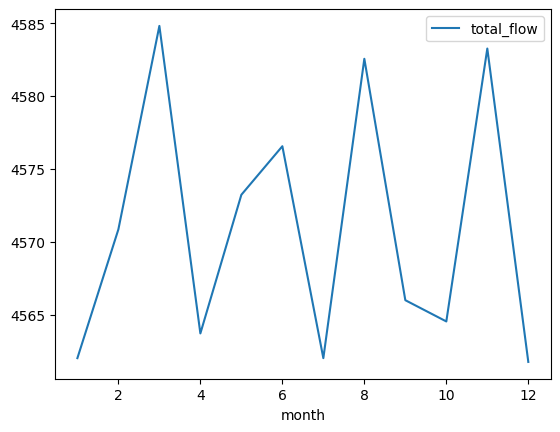

In [25]:
# busiest months - limited data because of NaN values in total_flow
pandas_test_df['month'] = pandas_test_df['timestamp_conv'].dt.month
group_by_month = pd.DataFrame(pandas_test_df.groupby('month')['total_flow'].mean())
print(group_by_month)
group_by_month.plot(y='total_flow')  # timestamp is now x-axis

00:01:14 - cmdstanpy - INFO - Chain [1] start processing


                       ds     y
12    2024-05-01 00:00:00  68.6
4900  2024-05-01 01:00:00  68.1
9788  2024-05-01 02:00:00  67.9
14674 2024-05-01 03:00:00  68.1
19562 2024-05-01 04:00:00  69.8


00:01:14 - cmdstanpy - INFO - Chain [1] done processing


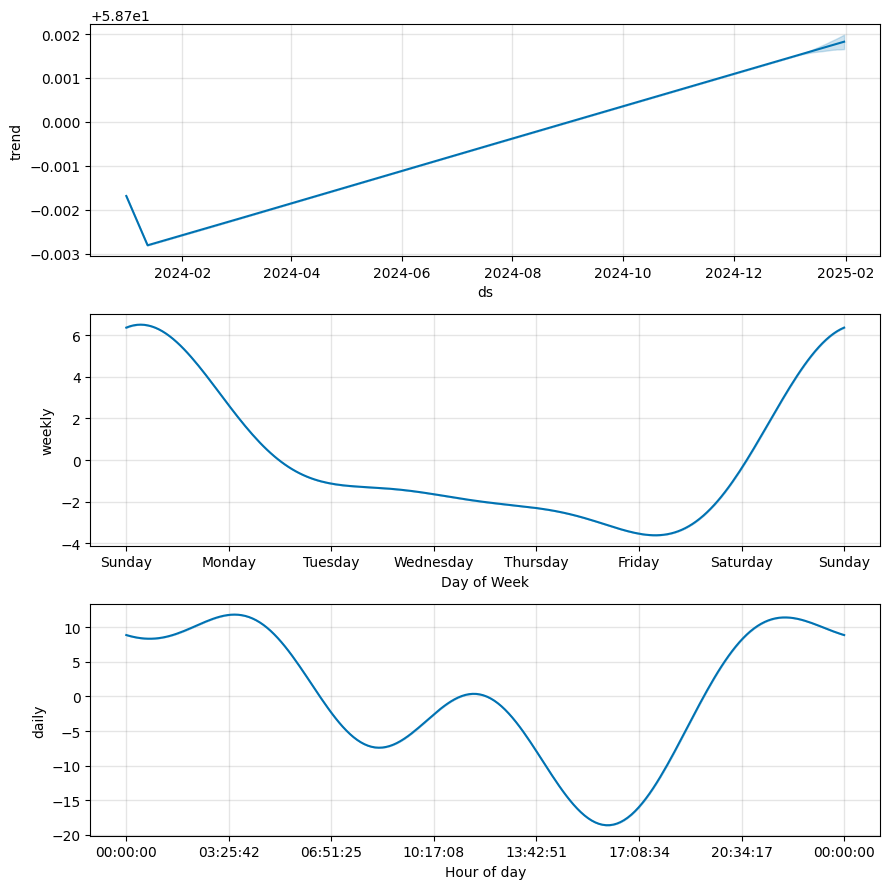

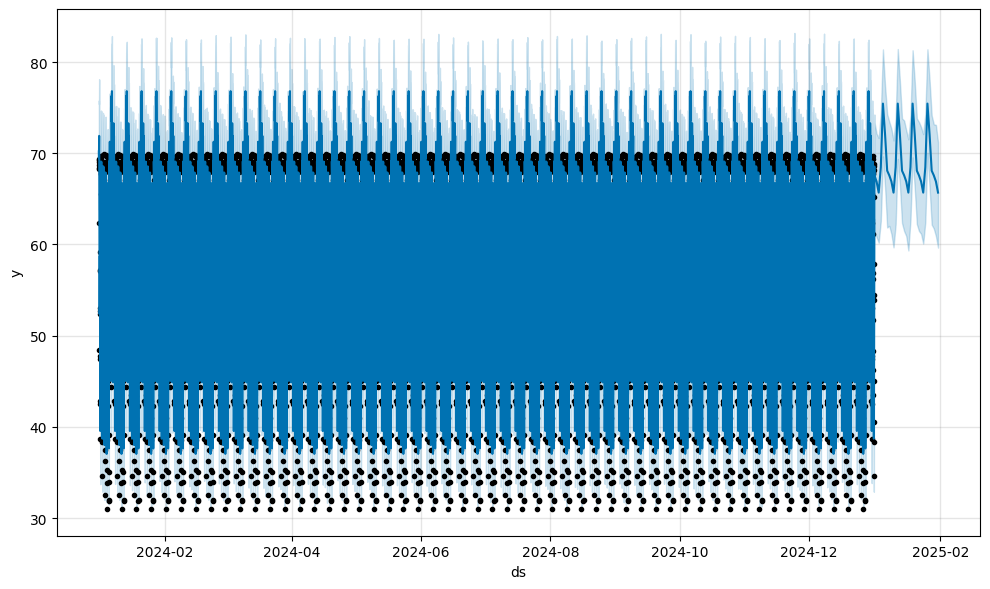

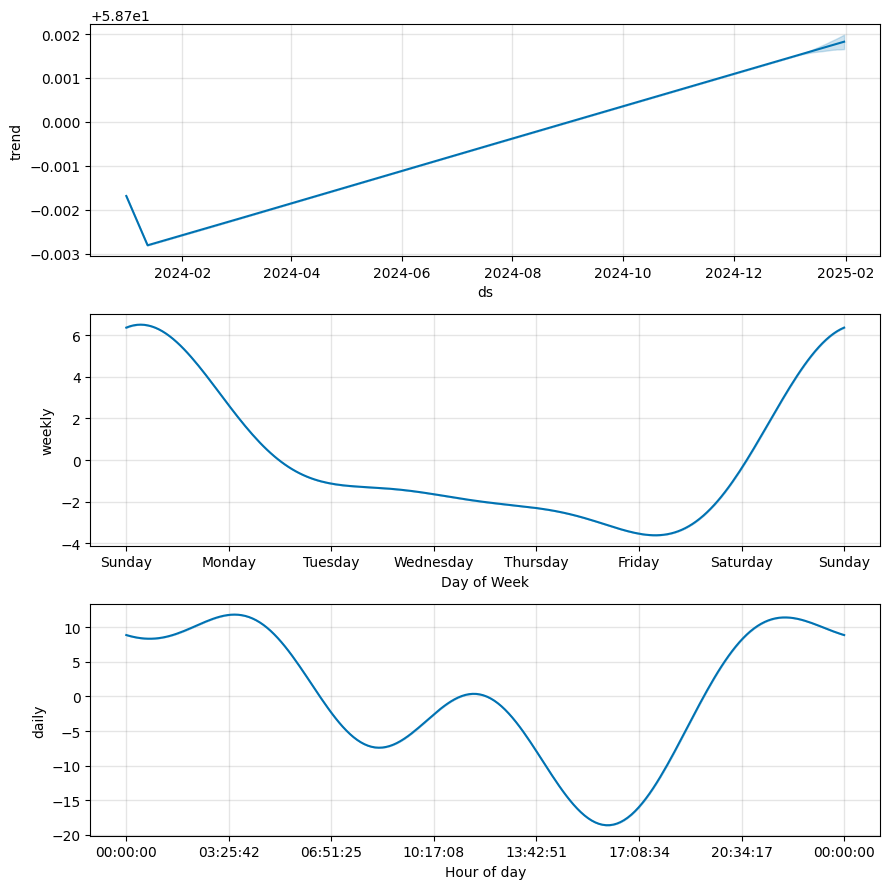

In [15]:
##### prophet model
# only models target variable
# good at missing data, seasonality, and outliers
# needs: regular timestamps, constant mean & variance, no large missing gaps, sufficient data -> ARIMA
from prophet import Prophet
df_prophet = pandas_test_df[['timestamp_conv', 'avg_speed']]
df_prophet.columns = ['ds', 'y']
print(df_prophet.head())
# create and fit model
model = Prophet()
model.fit(df_prophet)

# future predictions for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# visualize forecast
model.plot(forecast)
model.plot_components(forecast) # trend and seasonality components

                       ds     y
12    2024-05-01 00:00:00  68.6
4900  2024-05-01 01:00:00  68.1
9788  2024-05-01 02:00:00  67.9
14674 2024-05-01 03:00:00  68.1
19562 2024-05-01 04:00:00  69.8


00:04:10 - cmdstanpy - INFO - Chain [1] start processing
00:04:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


TypeError: 'Figure' object is not subscriptable

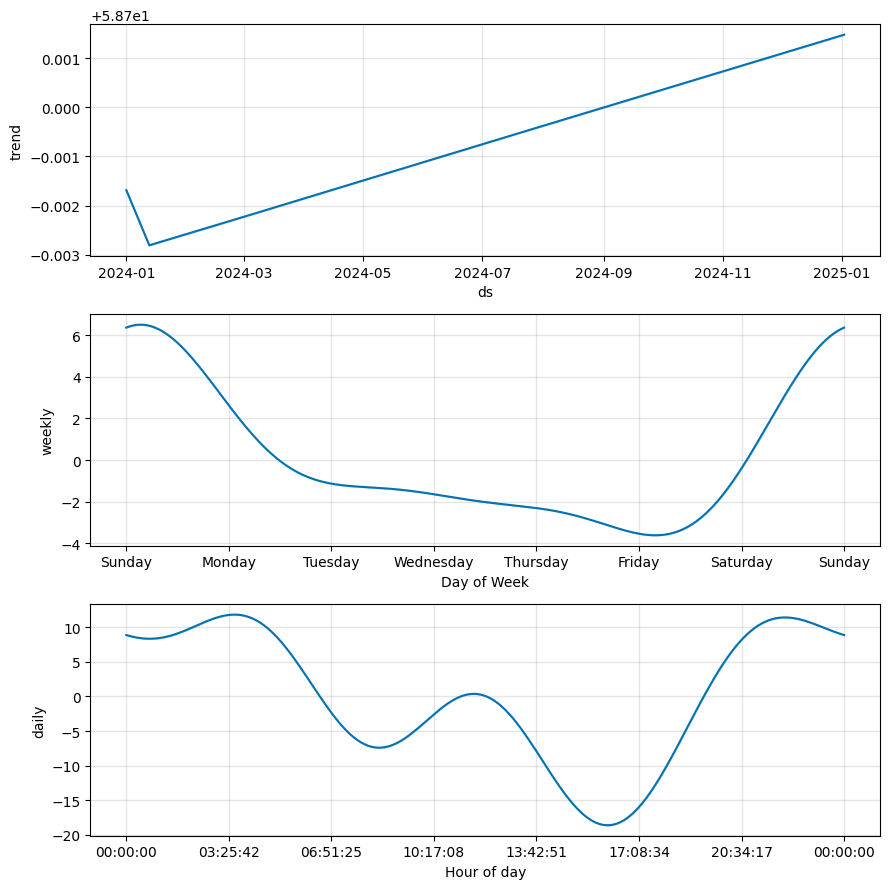

In [ ]:
from prophet import Prophet
df_prophet = pandas_test_df[['timestamp_conv', 'avg_speed']]
df_prophet.columns = ['ds', 'y']
print(df_prophet.head())
# create and fit model
model = Prophet()
model.fit(df_prophet)

# future predictions for 24 hours
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

# visualize forecast
# model.plot(forecast)
plots = model.plot_components(forecast) # trend and seasonality components

       avg_speed
month           
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN


<Axes: xlabel='month'>

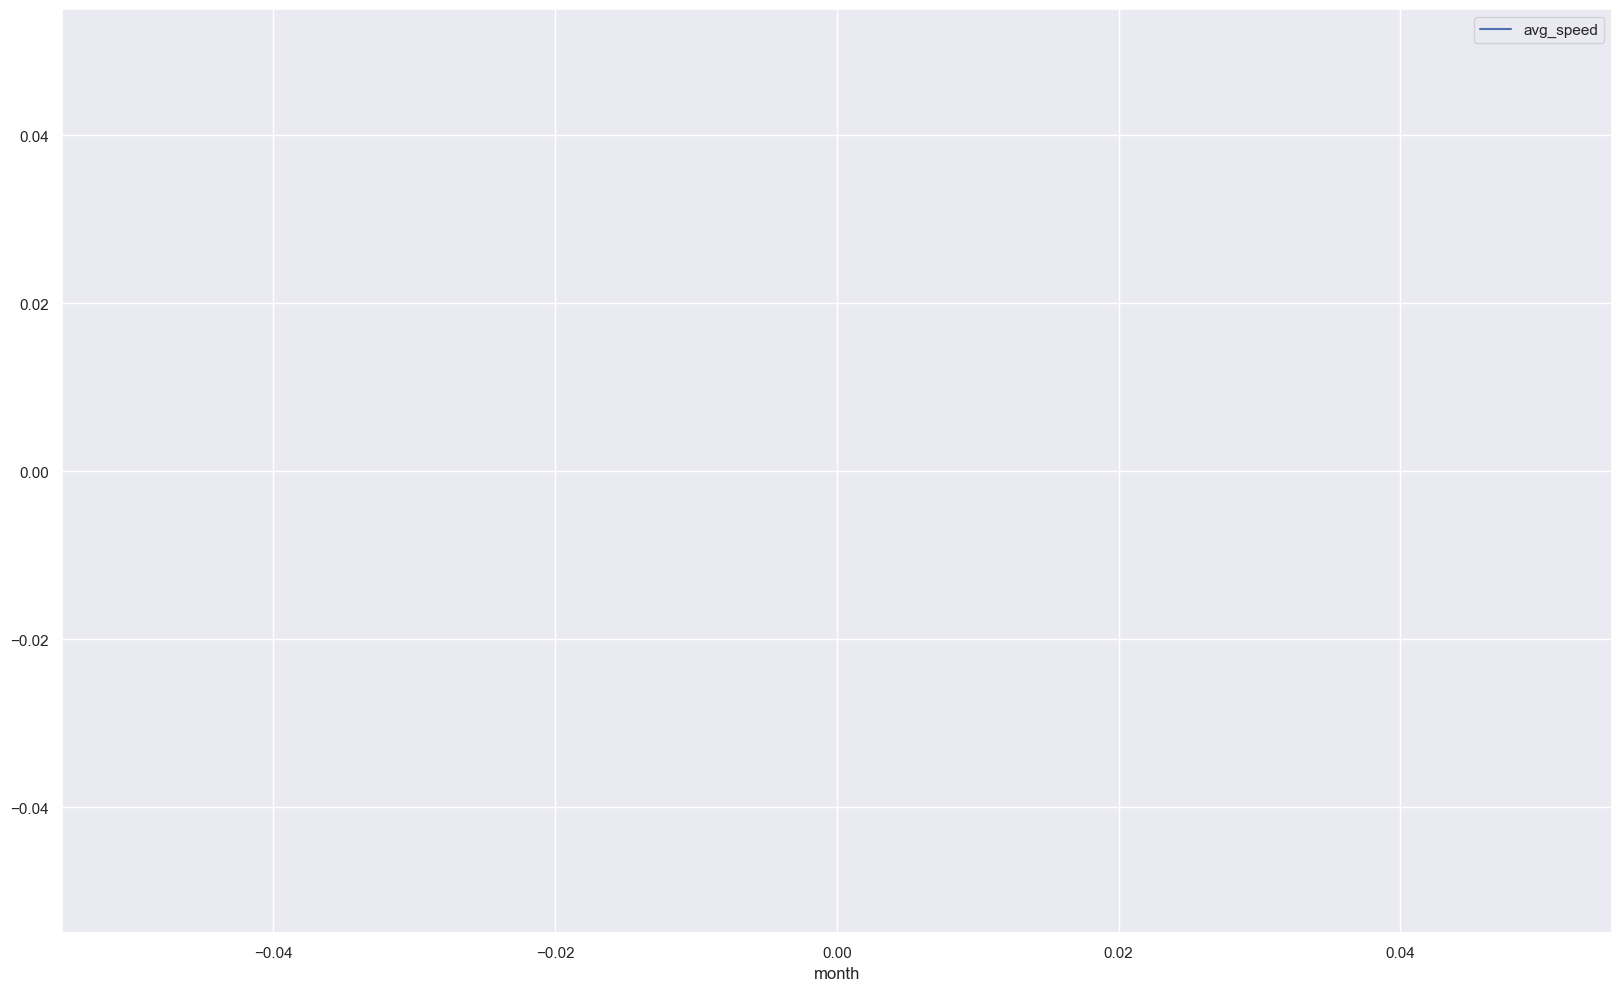

In [63]:
# busiest months - limited data because of NaN values in total_flow
pandas_test_df['month'] = pandas_test_df['timestamp_conv'].dt.month
group_by_month = pd.DataFrame(pandas_test_df.groupby('month')['avg_speed'].mean())
print(group_by_month)
group_by_month.plot(y='avg_speed')  # timestamp is now x-axis

In [36]:
df.isna().sum()

timestamp                  0
station_id                 0
district                   0
route_num                  0
travel_dir                 0
lane_type                  0
station_len         18435517
sample_num                 0
percent_observed           0
total_flow          13756449
avg_occupancy       13756449
avg_speed           18435517
delay_35            18435517
delay_40            18435517
delay_45            18435517
delay_50            18435517
delay_55            18435517
delay_60            18435517
lane_flow_1         13879727
lane_avg_occ_1      13879727
lane_avg_speed_1    18435517
lane_flow_2         25171480
lane_avg_occ_2      25171480
lane_avg_speed_2    25822020
lane_flow_3         26564984
lane_avg_occ_3      26564984
lane_avg_speed_3    26612490
lane_flow_4         29466953
lane_avg_occ_4      29466953
lane_avg_speed_4    29466953
lane_flow_5         38943810
lane_avg_occ_5      38943810
lane_avg_speed_5    38943810
lane_flow_6         42243072
lane_avg_occ_6

# New Section

In [ ]:
sns.set_theme(rc={'figure.figsize':(15,12)})

<Axes: xlabel='timestamp_conv', ylabel='avg_speed'>

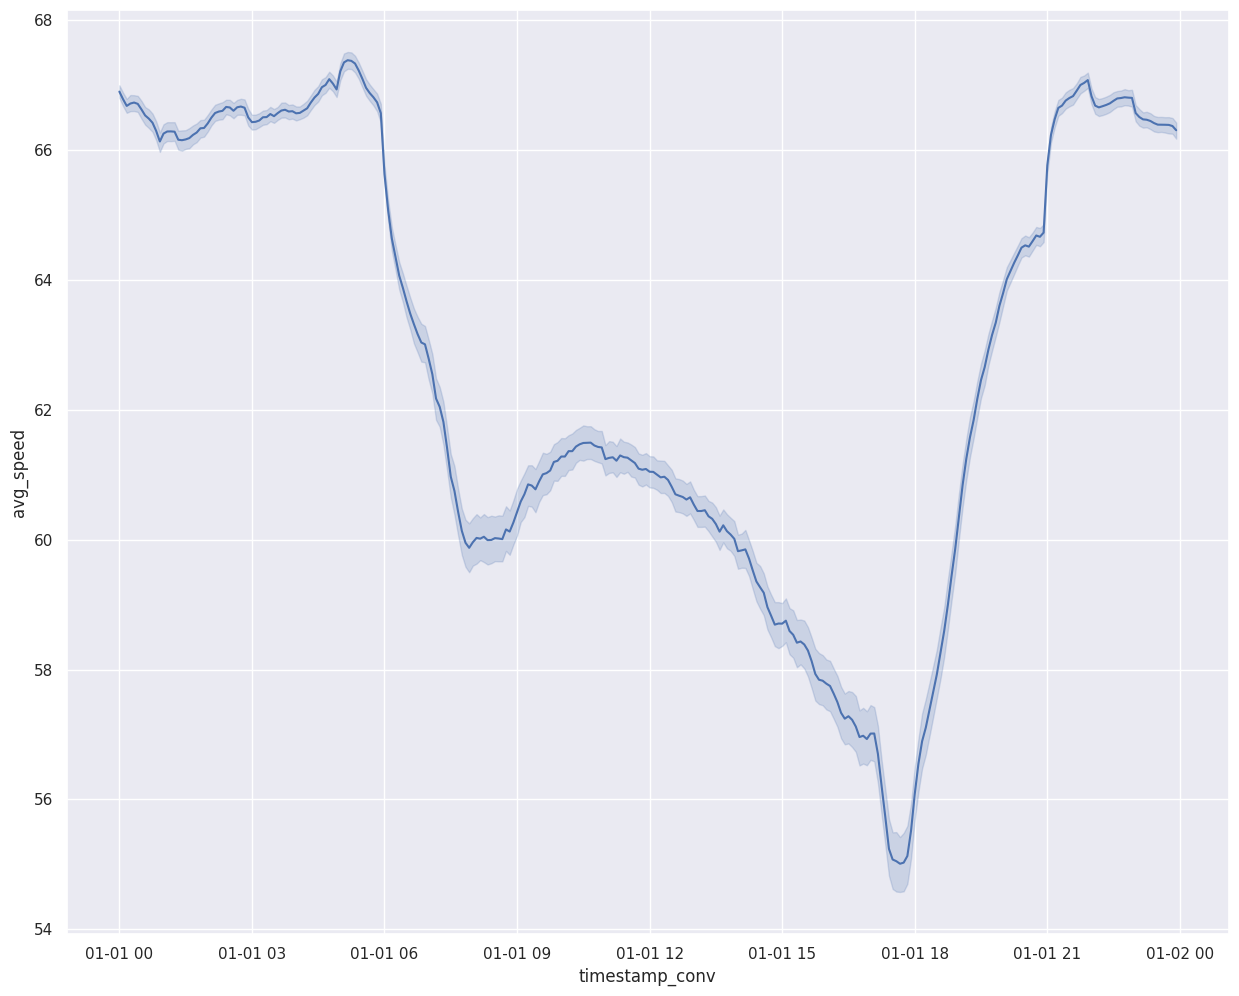

In [ ]:
# for given station id, plot time series data of avg speed over the period of one day, 1/1/2025
sns.lineplot(data=df, x="timestamp_conv", y="avg_speed")

<Axes: xlabel='timestamp_conv', ylabel='avg_occupancy'>

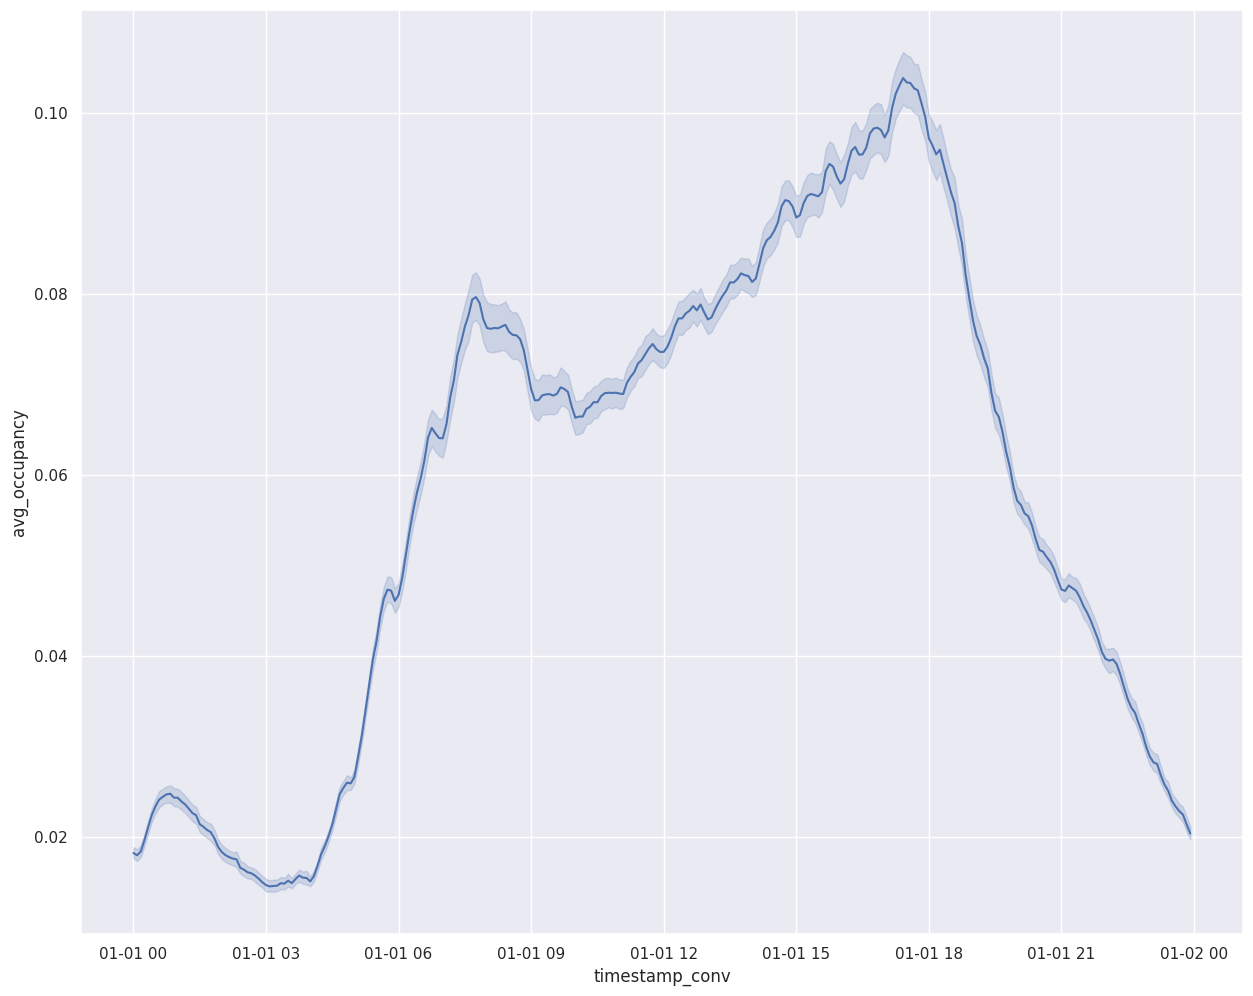

In [ ]:
sns.lineplot(data=df, x="timestamp_conv", y="avg_occupancy")

In [ ]:
# map for the station locations
# /content/d07_text_meta_2023_12_22.txt
locs_df = pd.read_csv('d07_text_meta_2023_12_22.txt', sep='\t')
locs_df

,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4
0,715898,5,N,7,37,40032.0,.68,117.313,33.880069,-118.021261,0.828,ML,3,PHOEBE,2029,NaN,NaN,NaN
1,715900,5,S,7,37,40032.0,1.06,117.630,33.882892,-118.026822,NaN,OR,1,VALLEY VIEW,3255,NaN,NaN,NaN
2,715901,5,N,7,37,40032.0,1.11,117.743,33.883400,-118.027451,NaN,OR,1,VALLEY VIEW,3268,NaN,NaN,NaN
3,715903,5,N,7,37,69154.0,1.56,118.193,33.886992,-118.034125,NaN,OR,1,ALONDRA,3269,NaN,NaN,NaN
4,715904,5,S,7,37,69154.0,2.27,118.840,33.892489,-118.044573,NaN,OR,1,CARMENITA,3253,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,777794,5,S,7,37,8954.0,29.68,146.250,34.184491,-118.316733,2.645,HV,1,BURBANK 1,3243,NaN,NaN,NaN
4884,777795,5,N,7,37,8954.0,29.68,146.313,34.184656,-118.316541,2.645,HV,1,BURBANK 1,3243,NaN,NaN,NaN
4885,777796,5,N,7,37,8954.0,29.68,146.313,34.184656,-118.316541,0.350,ML,5,BURBANK 1,3243,NaN,NaN,NaN
4886,777797,5,S,7,37,8954.0,29.68,146.250,34.184491,-118.316733,NaN,FR,3,BURBANK 1,3243,NaN,NaN,NaN


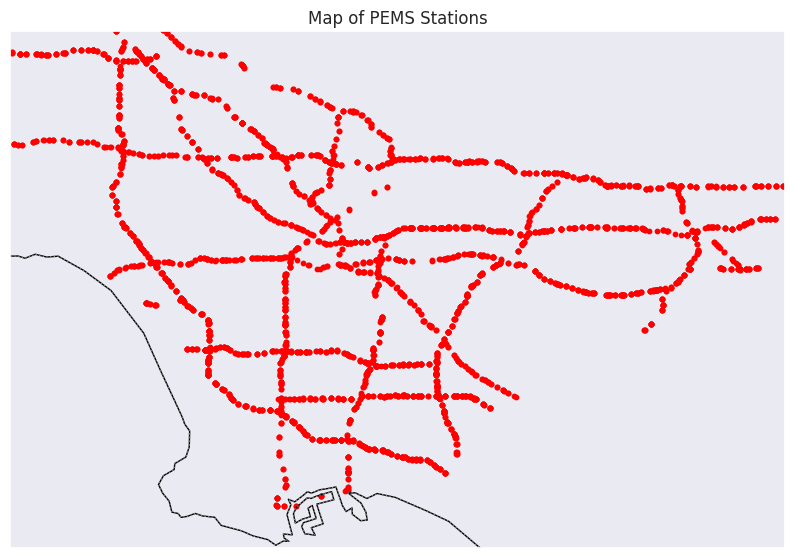

In [ ]:
# Create a figure with geographic projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
ax.set_extent([-118.6, -117.7, 33.7, 34.3])  # [west, east, south, north], LA county


# Plot points
ax.scatter(locs_df['Longitude'], locs_df['Latitude'], color='red', s=10, transform=ccrs.PlateCarree())

plt.title("Map of PEMS Stations")
plt.show()

In [ ]:
### ARIMA model
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
## XGBOOST to predict avg speed in the future

In [ ]:
df.groupby(['station_id'])

In [ ]:
df.columns = ['incident_id', 'cc_code', 'incident_num', 'timestamp', 'description', 'location', 'area', 'zoom_map',
              'tb_xy', 'lat', 'lon', 'district', 'county_fips_id', 'city_fips_id', 'freeway_num', 'freeway_dir', 'state_postmile',
              'abs_postmile', 'severity', 'duration']

In [ ]:
df.head()

,incident_id,cc_code,incident_num,timestamp,description,location,area,zoom_map,tb_xy,lat,lon,district,county_fips_id,city_fips_id,freeway_num,freeway_dir,state_postmile,abs_postmile,severity,duration
0,22839767,SAHB,250101,01/01/2025 00:00:00,1125-Traffic Hazard,US50 W I5 S CON / 5TH ST ONR,South Sac,NaN,NaN,38.567577,-121.512860,3.0,113.0,84816.0,50,W,L0.244,3.4,NaN,517.0
1,22839779,INHB,250101,01/01/2025 00:05:00,1125A-Animal Hazard,Sr91 W / Kraemer Blvd,Santa Ana,NaN,NaN,33.848002,-117.855553,12.0,59.0,2000.0,91,W,7.287,25.7,NaN,18.0
2,22839781,SAHB,250101,01/01/2025 00:11:00,FIRE-Report of Fire,I5 S / March Ln Ofr,Stockton,NaN,NaN,37.987341,-121.344724,10.0,77.0,NaN,5,S,30.208,475.7,NaN,1.0
3,22839788,LAHB,250101,01/01/2025 00:18:00,1125A-Animal Hazard,Sr58 E / Coffee Rd,Bakersfield,NaN,NaN,35.366776,-119.092152,6.0,29.0,NaN,58,E,49.144,106.3,NaN,3.0
4,22839792,GGHB,250101,01/01/2025 00:20:00,20002-Hit and Run No Injuries,Us101 N / Santa Monica Rd,Santa Barbara,NaN,NaN,34.403647,-119.528067,5.0,83.0,11446.0,101,N,3.777,86.7,NaN,184.0


In [ ]:
df_mod = df[df['lat'].notna()]

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


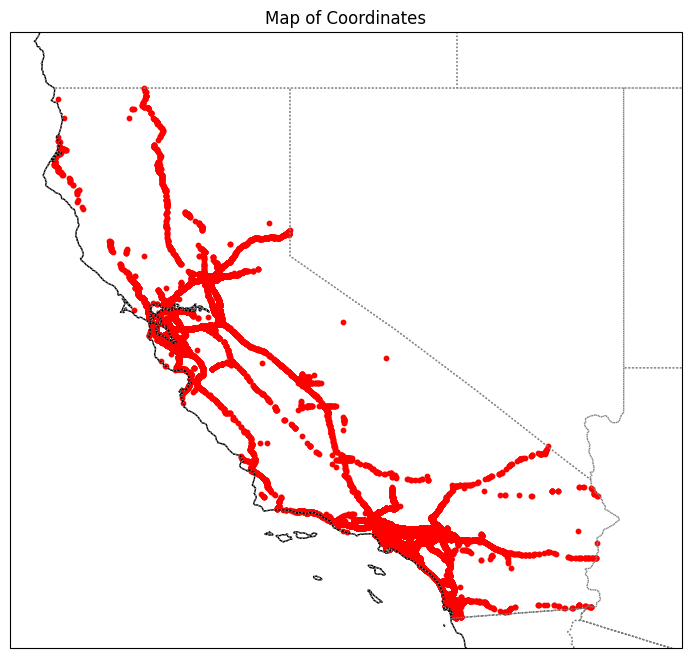

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Create a figure with geographic projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
ax.set_extent([-125, -113, 32, 43])  # [west, east, south, north]


# Plot points
ax.scatter(df['lon'], df['lat'], color='red', s=10, transform=ccrs.PlateCarree())

plt.title("Map of Coordinates")
plt.show()


In [ ]:
import folium

# Center the map on the average coordinates
lat_center = df['lat'].mean()
lon_center = df['lon'].mean()

m = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# Add markers
for _, row in df.iterrows():
  folium.Marker(
      location=[row['lat'], row['lon']]
      # popup=row['location']
  ).add_to(m)

# Save to HTML or display directly in Jupyter Notebook
m.save("map.html")
# m  # if using Jupyter


In [ ]:
top_ten = list(df['description'].value_counts().index[0:10])
top_ten

['1125-Traffic Hazard',
 '1183-Trfc Collision-Unkn Inj',
 '1182-Trfc Collision-No Inj',
 'FIRE-Report of Fire',
 '1179-Trfc Collision-1141 Enrt',
 '20002-Hit and Run No Injuries',
 '1125A-Animal Hazard',
 'CZP-Assist with Construction',
 'CFIRE-Car Fire',
 'ANIMAL-Live or Dead Animal']

In [ ]:
df['description_mod'] = ['Other' if x not in top_ten else x for x in df['description']]

In [ ]:
order = df['description_mod'].value_counts().sort_values(ascending=False)

In [ ]:
order.index

Index(['1125-Traffic Hazard', '1183-Trfc Collision-Unkn Inj',
       '1182-Trfc Collision-No Inj', 'FIRE-Report of Fire',
       '1179-Trfc Collision-1141 Enrt', 'Other',
       '20002-Hit and Run No Injuries', '1125A-Animal Hazard',
       'CZP-Assist with Construction', 'CFIRE-Car Fire',
       'ANIMAL-Live or Dead Animal'],
      dtype='object', name='description_mod')

<Axes: xlabel='count', ylabel='description_mod'>

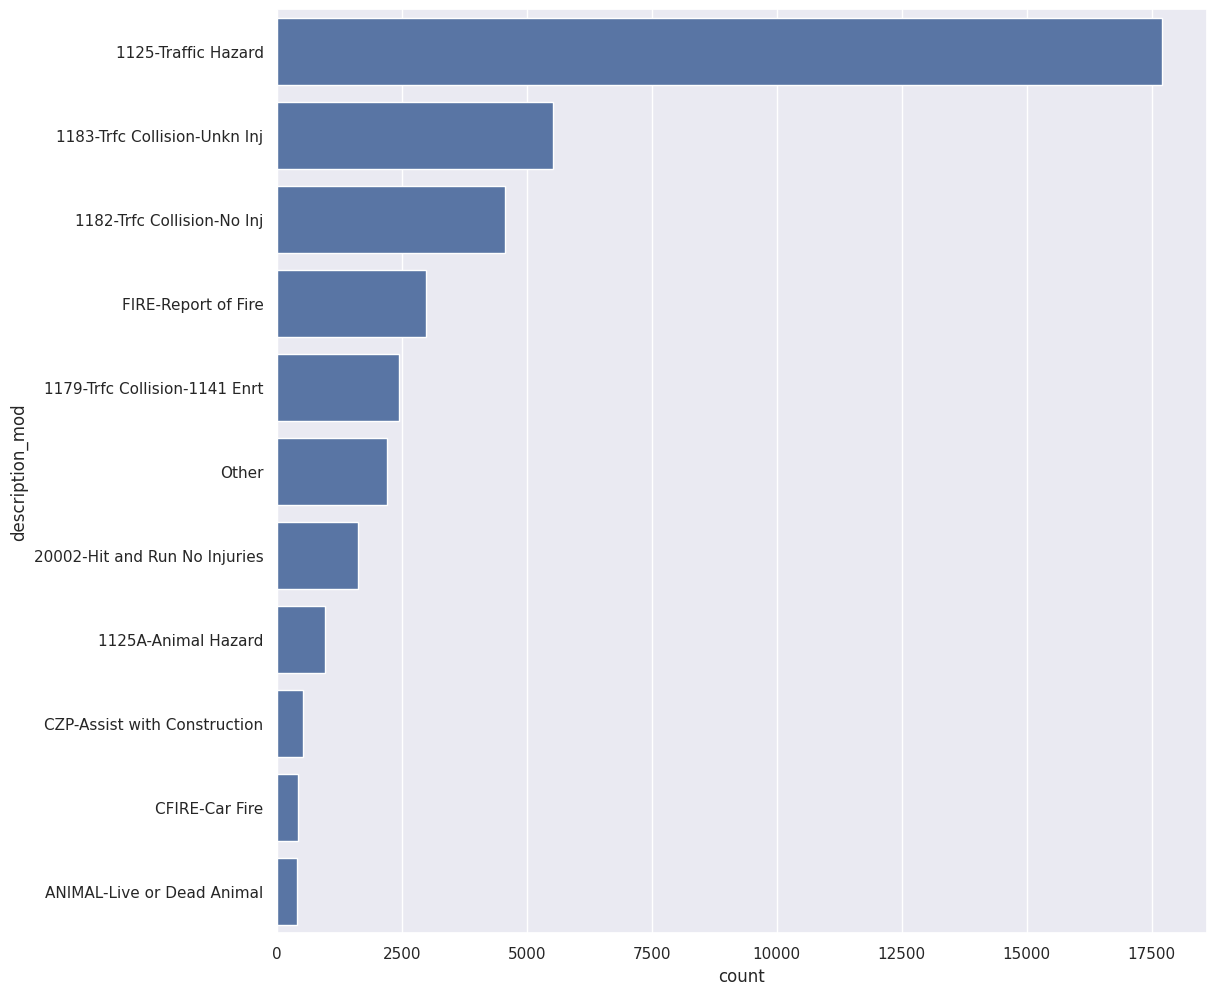

In [ ]:
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.countplot(y='description_mod', data=df, order=list(order.index))

In [ ]:
censusDay = pd.read_csv('volumeDay.txt', header=None)
censusDay.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,01/01/2019 00:00:00,19280,1928001,101,N,NaN,23,1,660.821,ML,...,145,145,115,115,74,74,66,66,45,45
1,01/01/2019 00:00:00,19280,1928005,101,S,NaN,23,1,660.153,ML,...,78,78,61,61,34,34,20,20,18,18
2,01/01/2019 00:00:00,19300,1930001,101,N,NaN,15,1,791.454,ML,...,133,133,84,84,71,71,40,40,23,23
3,01/01/2019 00:00:00,19300,1930005,101,S,NaN,15,1,790.929,ML,...,135,135,97,97,78,78,33,33,27,27
4,01/01/2019 00:00:00,19870,1987001,101,N,23042.0,23,1,706.373,ML,...,572,572,424,424,317,317,229,229,163,163


In [ ]:
censusDay.columns = ['timestamp', 'census_station_id', 'census_sub_id', 'freeway_id', 'freeway_dir', 'fips_city_code', 'fips_county_code', 'district', 'abs_postmile', 'station_typ', ]

In [ ]:
Timestamp	The date and time of the beginning of the summary interval. For example, a date of 1/1/2012 indicates that the aggregate(s) contain measurements collected between 1/1/2012 00:00:00 and 1/1/2012 23:59:59. Note that hour, minute, and second values are always 0 for daily aggregations. The format is MM/DD/YYYY HH24:MI:SS.
Census Station Identifier	The unique number that identifies this census station within PeMS.
Census Substation Identifier	The unique number that identifies this census substation within PeMS.
Freeway Identifier	The unique number that identifies this freeway within PeMS. Typically, the value is the number commonly used to refer to the roadway. For example; for I-5, the value is 5
Freeway Direction	A string indicating the freeway direction.
FIPS City Code	The FIPS-assigned number for the city which contains this census station.
FIPS County Code	The FIPS assigned number for the county which contains this census station
District	The unique number that identifies the Caltrans district that contains this census station.
Absolute Postmile	The absolute postmile where this census station is located.
Station Type	A string indicating the type of station. Possible values (and their meaning are:
CD (Coll/Dist)
CH (Conventional Highway)
FF (Fwy-Fwy connector)
FR (Off Ramp)
HV (HOV)
ML (Mainline)
OR (On Ramp)

Census Station Set ID	The unique number that identifies the census station set within PeMS.
Lane	Lane number.
Observed Flow	Observed Flow
Estimated Flow	Estimated flow
Samples	The number of samples taken
Estimates	TBD
-----------	Below are the Observed Flow and Estimated Flow for each lane. Lowest lane number first	--------------
Observed Flow for Lane N/td>	observed flow for lane N/td>	vehicles/day
Estimated Flow for Lane N	estimated flow for lane N

In [ ]:
01/01/2019 00:00:00,19280,1928001,101,N,,23,1,660.821,ML,50389,
0,2316,2316,24,
0,25,25,18,18,10,10,8,8,14,14,9,9,3,3,24,24,30,30,63,63,97,97,131,131,165,165,155,155,210,210,251,251,257,257,240,240,161,161,145,145,115,115,74,74,66,66,45,45

In [ ]:
df = pd.read_csv('caltrans_hours.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,01/01/2025 00:00:00,715898,7,5,N,ML,0.828,0,0,2183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2025 00:00:00,715900,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2025 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2025 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2025 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(47001, 42)

In [ ]:
01/01/2025 00:00:00,
715915,
7,
5,
N,
ML,
.62,0,0,1806,.032,68.6,0,0,0,0,0,0,478,.0227,72.3,780,.0403,70.1,548,.0329,63.1,,,,,,,,,,,,,,,


In [ ]:
df.columns = ['timestamp', 'station_name', 'district_num', 'route_num', 'travel_dir', 'lane_typ', 'station_len', 'num_samples', 'percent_observed', 'total_flow', 'avg_occ', 'avg_speed', 'delay_35', 'delay_40', 'delay_45', 'delay_50', 'delay_55', 'delay_60', 'lane_n_flow', 'lane_n_avg_occ', 'lane_n_avg_speed']

ValueError: Length mismatch: Expected axis has 42 elements, new values have 21 elements